# INFO 2950 Final Project Phase II  
Mary Kolbas (mck86)  
Tammy Zhang (tz332)  


In [1]:
# importing libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# reading in raw provided data
csv = pd.read_csv("PFW_2021_public.csv")

In [3]:
# making dataframe
df = pd.DataFrame(csv)

In [4]:
# dropping irrelevant columns
df.drop(['latitude', 'longitude', 'entry_technique', 'PROJ_PERIOD_ID', 'reviewed', 'day1_am', 'sub_id', 'obs_id',
        'day1_pm', 'day2_am', 'day2_pm', 'effort_hrs_atleast', 'Data_Entry_Method'], axis= 1, inplace= True)

In [5]:
# dropping observations outside of NY
df = df[df['subnational1_code'] == "US-NY"]

# dropping observations that are not valid
df = df[df['valid'] == 1]

In [6]:
df

,loc_id,subnational1_code,Month,Day,Year,species_code,how_many,valid,snow_dep_atleast
9808,L6731705,US-NY,11,14,2020,blujay,1,1,0.000
9809,L6731705,US-NY,11,14,2020,norcar,1,1,0.000
9810,L6731705,US-NY,11,14,2020,dowwoo,1,1,0.000
9811,L6731705,US-NY,11,14,2020,tuftit,2,1,0.000
9812,L6731705,US-NY,11,14,2020,bkcchi,2,1,0.000
...,...,...,...,...,...,...,...,...,...
2897100,L2404002,US-NY,2,10,2021,daejun,3,1,0.001
2897101,L2404002,US-NY,2,10,2021,amerob,1,1,0.001
2897102,L2404002,US-NY,2,10,2021,houfin,11,1,0.001
2897103,L2404002,US-NY,2,10,2021,norcar,5,1,0.001


In [103]:
# making a list of the 25 most frequently observed species
frequent_species = df['species_code'].value_counts()[:25].index

In [8]:
def snow_depth_species(species):
    """
    Returns: mean observed counts for the given species grouped by amount of snow.
    
    Parameter species: a string constituting a valid 6-letter avian species code.
    """
    species_df = df[df['species_code'] == species]
    species_df = species_df.dropna(subset=['snow_dep_atleast'])
    
    print('Snow Depth and Observations of ' + species)
    print(species_df.groupby(by=['snow_dep_atleast']).mean()['how_many'])

In [110]:
# Uncomment below to print out grouped averages for all top frequent species
# for species in frequent_species:
#     snow_depth_species(species)

In [104]:
# creating new dataframe limited to just the most frequent species observations
species_limited_df = df[df['species_code'].isin(frequent_species)]

# dropping rows where snow depth was null
species_limited_df = species_limited_df.dropna(subset=['snow_dep_atleast'])

In [105]:
species_limited_df

,loc_id,subnational1_code,Month,Day,Year,species_code,how_many,valid,snow_dep_atleast
9808,L6731705,US-NY,11,14,2020,blujay,1,1,0.000
9809,L6731705,US-NY,11,14,2020,norcar,1,1,0.000
9810,L6731705,US-NY,11,14,2020,dowwoo,1,1,0.000
9811,L6731705,US-NY,11,14,2020,tuftit,2,1,0.000
9812,L6731705,US-NY,11,14,2020,bkcchi,2,1,0.000
...,...,...,...,...,...,...,...,...,...
2897100,L2404002,US-NY,2,10,2021,daejun,3,1,0.001
2897101,L2404002,US-NY,2,10,2021,amerob,1,1,0.001
2897102,L2404002,US-NY,2,10,2021,houfin,11,1,0.001
2897103,L2404002,US-NY,2,10,2021,norcar,5,1,0.001


In [106]:
# creating new category with string corresponding to each value in snow depth (for binning in the line plots)
species_limited_df['snow_category'] = 'No Snow'
species_limited_df.loc[species_limited_df['snow_dep_atleast'] == 0.001, 'snow_category'] = '< 5 cm'
species_limited_df.loc[species_limited_df['snow_dep_atleast'] == 5.000, 'snow_category'] = '5 to 15 cm'
species_limited_df.loc[species_limited_df['snow_dep_atleast'] == 15.001, 'snow_category'] = '> 15 cm'

In [107]:
species_limited_df

,loc_id,subnational1_code,Month,Day,Year,species_code,how_many,valid,snow_dep_atleast,snow_category
9808,L6731705,US-NY,11,14,2020,blujay,1,1,0.000,No Snow
9809,L6731705,US-NY,11,14,2020,norcar,1,1,0.000,No Snow
9810,L6731705,US-NY,11,14,2020,dowwoo,1,1,0.000,No Snow
9811,L6731705,US-NY,11,14,2020,tuftit,2,1,0.000,No Snow
9812,L6731705,US-NY,11,14,2020,bkcchi,2,1,0.000,No Snow
...,...,...,...,...,...,...,...,...,...,...
2897100,L2404002,US-NY,2,10,2021,daejun,3,1,0.001,< 5 cm
2897101,L2404002,US-NY,2,10,2021,amerob,1,1,0.001,< 5 cm
2897102,L2404002,US-NY,2,10,2021,houfin,11,1,0.001,< 5 cm
2897103,L2404002,US-NY,2,10,2021,norcar,5,1,0.001,< 5 cm


In [108]:
# creating plotting function
def plot_by_species(df):
    # grouping by species and snow, averaging counts for each species per snow category
    average = df.groupby(by=['species_code', 'snow_category']).mean()
    average = average.reindex(index = ['No Snow','< 5 cm','5 to 15 cm', '> 15 cm'], level = 1)
    fig = plt.gcf()
    fig.set_size_inches(14, 8)
    ax = sns.lineplot(data = average, x = average.index.get_level_values(1).to_list(), y = average['how_many'], hue='species_code', marker='o').set(title="Avian Species at Feeders with Different Snow Levels")
    plt.legend(loc = "upper left", bbox_to_anchor=(1, 1))
    return ax

[Text(0.5, 1.0, 'Avian Species at Feeders with Different Snow Levels')]

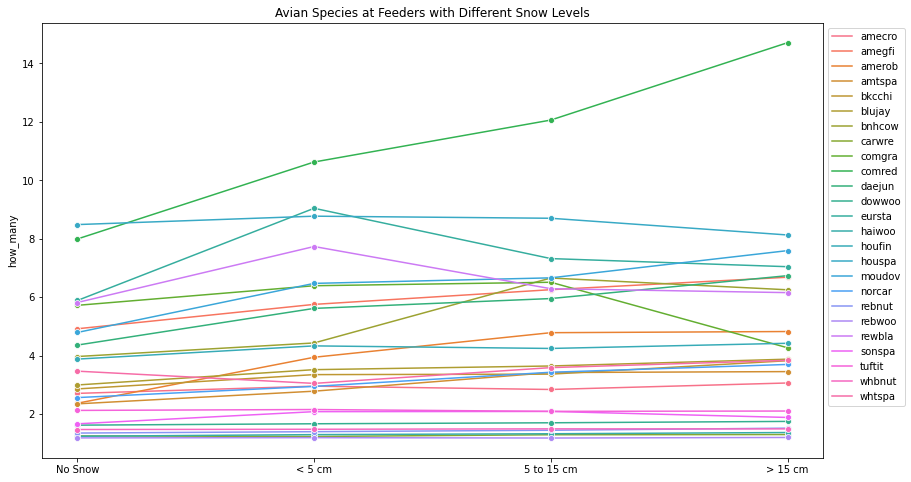

In [109]:
plot_by_species(species_limited_df)